# Import libraries

In [147]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Read the data 

In [148]:
original = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
original.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [149]:
# Check the no. of records
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [150]:
# Check the Basic Distribution of Data
original.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [151]:
original.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [152]:
print ( "Shape of Data:" , original.shape)

Shape of Data: (5000, 14)


# seperate the features and target from original data

In [153]:
feature=original.drop("Personal Loan",axis=1)
target=original["Personal Loan"]

loans = feature.join(target)

# observe the top 5 values

In [154]:
loans.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


# observe the last 5 values

In [155]:
loans.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


# Explooratory Data Analysis

In [156]:
#detailed info of data

listItem = []
for col in loans.columns :
    listItem.append([col,loans[col].dtype,
                     loans[col].isna().sum(),
                     round((loans[col].isna().sum()/len(loans[col])) * 100,2),
                    loans[col].nunique(),
                     list(loans[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,5000,"[3424, 3442, 475, 2757, 2563]"
1,Age,int64,0,0.0,45,"[46, 27, 33, 24, 59]"
2,Experience,int64,0,0.0,47,"[19, 18, 3, 6, 12]"
3,Income,int64,0,0.0,162,"[145, 29, 64, 68, 14]"
4,ZIP Code,int64,0,0.0,467,"[91711, 94611, 94305, 95747, 90254]"
5,Family,int64,0,0.0,4,"[2, 1, 4]"
6,CCAvg,float64,0,0.0,108,"[7.2, 0.0, 0.4, 3.6, 2.6]"
7,Education,int64,0,0.0,3,"[1, 2, 3]"
8,Mortgage,int64,0,0.0,347,"[77, 98, 163, 0, 246]"
9,Securities Account,int64,0,0.0,2,"[1, 0]"


# Data cleaning

missing value visualisation

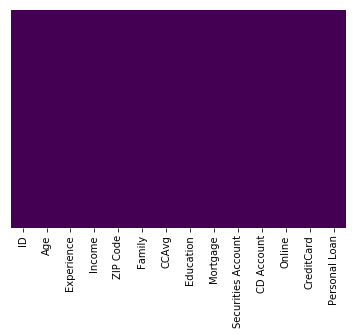

In [157]:
sns.heatmap(loans.isna(),yticklabels=False,cbar=False,cmap='viridis')

# irregular value analysis

In [158]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# irregular value visualisation

In [159]:
outvis = loans.copy()
def fungsi(x):
    if x<0:
        return np.NaN
    else:
        return x
    
outvis["Experience"] = outvis["Experience"].apply(fungsi)

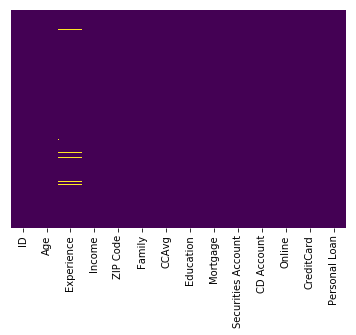

In [160]:
sns.heatmap(outvis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

insight: there are few missing values in experience

# 2nd Irregular value analysis

In [161]:
pd.DataFrame(loans.groupby("Education").mean()["Experience"])

,Experience
Education,
1,20.065363
2,19.770492
3,20.471686


In [162]:
pd.DataFrame(loans.groupby("Age").mean()["Experience"]).tail(8)

,Experience
Age,
60,34.645669
61,35.672131
62,36.829268
63,37.638889
64,38.846154
65,39.812500
66,40.875000
67,41.833333


plotting the average experience with age.

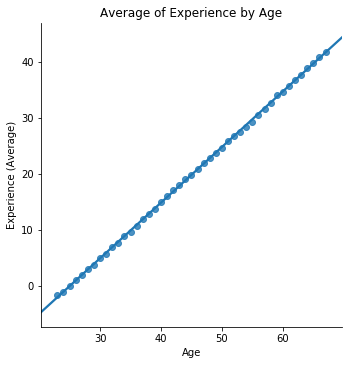

In [163]:
pltdf = pd.DataFrame(loans.groupby("Age").mean()["Experience"]).reset_index()
sns.lmplot(x='Age',y='Experience',data=pltdf)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")
plt.show()

as experience cannot have negative values checking if it has w.r.t age

In [164]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age")).head()

,Age,Experience
2717,23,-2
3130,23,-2
3425,23,-1
2962,23,-2
909,23,-1


In [165]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Age"].unique()

array([23, 24, 25, 26, 28, 29], dtype=int64)

checking for the unique values of experience column

In [166]:
pd.DataFrame(loans[loans["Experience"]<0][["Age","Experience"]].sort_values("Age"))["Experience"].unique()

array([-2, -1, -3], dtype=int64)

using abs we can change the sign of the values for further analysis instead of loosing the data

In [167]:
loans["Experience"] = loans["Experience"].apply(abs)

study of the loan data..

In [168]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# Data type analysis


It's important to make sure that each feature already use correct data type. Please make sure all features already use correct data type based on whether the feature is categorical or numerical. Please change:

categorical feature into 'int64', and
numerical feature into 'float64'

Categorical feature:

ordinal:
-Family
-Education

nominal:
-ID
-Zip Code
-Securities Account
-CD Account
-Online
-Credit Card

Numerical feature:

Interval or Ratio:    
-Age
-Experience
-Income
-CCAvg
-Mortage

In [169]:
loans[["Age","Experience","Income","CCAvg","Mortgage"]] = loans[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)

In [170]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


# Feature correlation analysis

The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).

In [171]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]

# Heatmap correlation


Heatmap is one of simplest method to analyze feature correlation.

Heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
Heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target

it is correlation between one variable to other

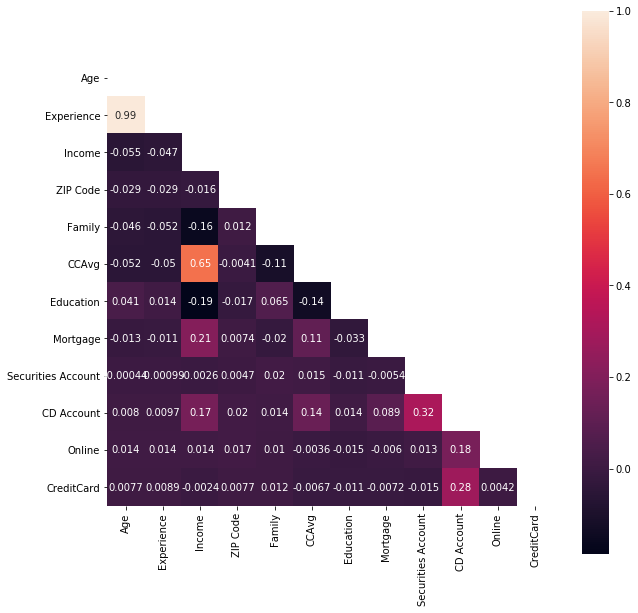

In [172]:
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

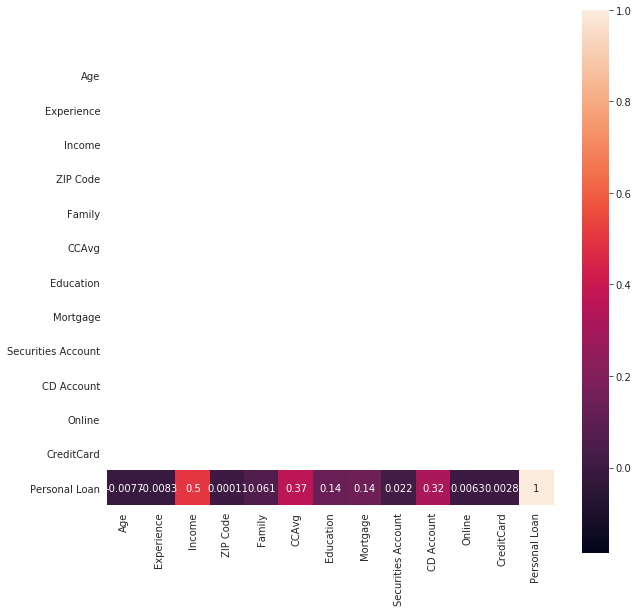

In [173]:
loans_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(loans_corr, annot=True,square=True,mask=mask)

# Distribution analysis

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

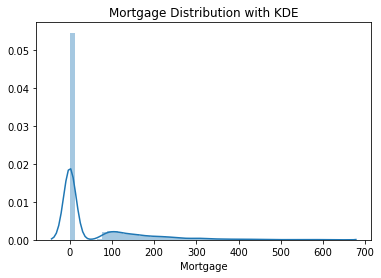

In [174]:
sns.distplot(feature["Mortgage"])
plt.title("Mortgage Distribution with KDE")

# Irregular value handling feature 2 (extreme positive skewed data)

Text(0.5, 1.0, 'Mortgage Distribution with KDE First Transformation')

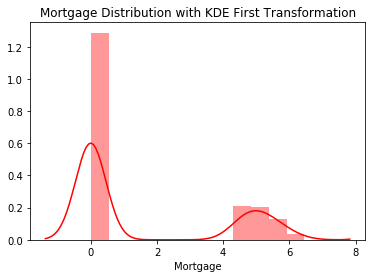

In [175]:
SingleLog_y = np.log1p(feature["Mortgage"])              # Log transformation of the target variable
sns.distplot(SingleLog_y, color ="r")
plt.title("Mortgage Distribution with KDE First Transformation")

Text(0.5, 1.0, 'Mortgage Distribution with KDE Second Transformation')

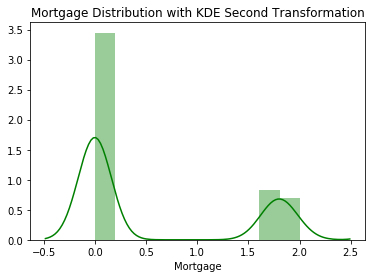

In [176]:
DoubleLog_y = np.log1p(SingleLog_y)
sns.distplot(DoubleLog_y, color ="g")
plt.title("Mortgage Distribution with KDE Second Transformation")

In [177]:
loans["Mortgage"] = DoubleLog_y

# Distribution analysis 2

In [178]:
source_counts =pd.DataFrame(loans["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

,Labels,Personal Loan
0,0,4520
1,1,480


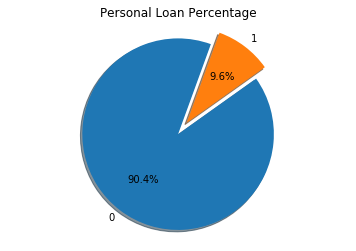

In [179]:
#https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

Text(0.5, 1.0, 'Income Distribution')

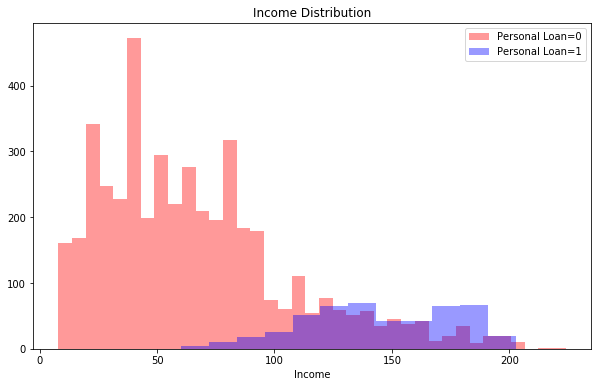

In [180]:
# the plot represents how much is income dependent on personal loans
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

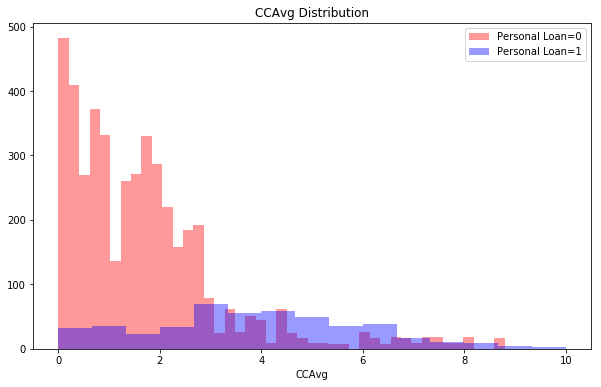

In [181]:
# the plot represents how much is CCAvg dependent on personal loans
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Experience Distribution')

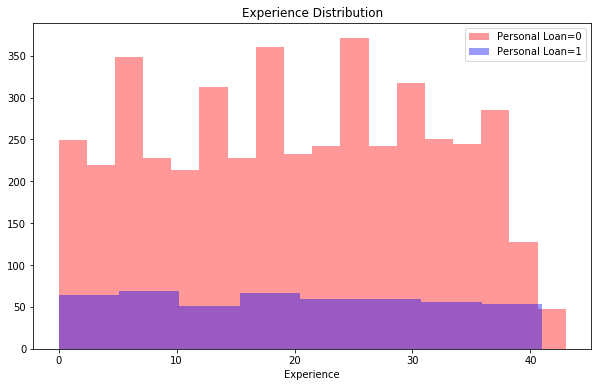

In [182]:
# the plot represents how much is Experience dependent on personal loans
plt.figure(figsize=(10,6))
sns.distplot(loans[loans["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(loans[loans["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

Text(0.5, 1.0, 'Securities Account Countplot')

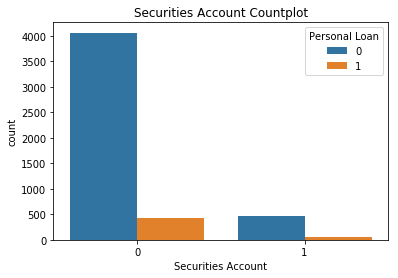

In [183]:
# the plot represents how much is securities account dependent on personal loans

sns.countplot(x='Securities Account',data=loans,hue='Personal Loan')
plt.title("Securities Account Countplot")

Text(0.5, 1.0, 'Family Countplot')

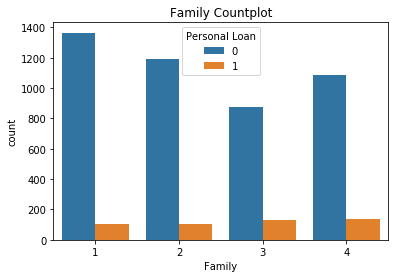

In [184]:
# the plot represents how much is family dependent on personal loans

sns.countplot(x='Family',data=loans,hue='Personal Loan')
plt.title("Family Countplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

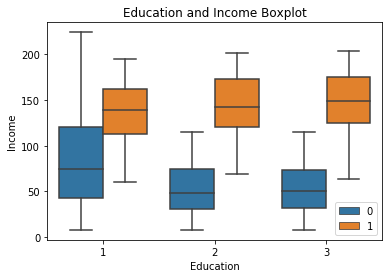

In [185]:
# the plot represents how much is education dependent on personal loans

sns.boxplot(x='Education',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education and Income Boxplot")

Text(0.5, 1.0, 'Family and Income Boxplot')

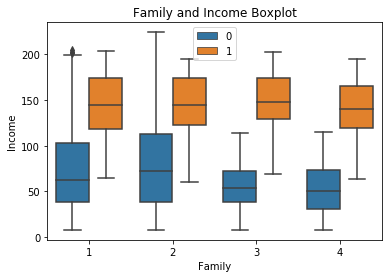

In [186]:
# the plot represents how much is family dependent on income

sns.boxplot(x='Family',data=loans,hue='Personal Loan',y='Income')
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

# Feature Selection


Based on "Feature correlation analysis" & "Distribution analysis" you can throw away some unnecessary features or even you want to add new feature. Please do some handling about feature selection (selecting necessary features) and state your reason for such handling.

feature is chosed as ID and personal loan based on the previopus insights

the target column is chosen to be personal loan as it the one that is to be predict with respect to few other variables like id.

In [187]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]

# Features Removing

removing features other than ID and Personal loan as they are  mostly dependent compared to all other variables

In [188]:
feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

In [189]:
feature combination is u

SyntaxError: invalid syntax (<ipython-input-189-6505c7096825>, line 1)

In [190]:
feature["Combination"] = (feature["Income"]/12)**feature["CCAvg"]

# Feature Scaling

In [191]:
scaler = StandardScaler();



colscal=["Experience","Mortgage","Income","CCAvg","Combination"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature =feature.drop(colscal,axis=1)
feature = scaled_features.join(feature)

# split data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                    random_state=100)

In [193]:
y_train.value_counts()

0    3178
1     322
Name: Personal Loan, dtype: int64

# KNN

In [194]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [195]:
y_pred = classifier.predict(X_test)

# confusion matrix

In [196]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1342    0]
 [  73   85]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1342
           1       1.00      0.54      0.70       158

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.97      0.77      0.84      1500
weighted avg       0.95      0.95      0.94      1500



In [197]:
predict = classifier.predict(X_test.values)
predictProb = classifier.predict_proba(X_test.values)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))


[[1342    0]
 [  73   85]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1342
           1       1.00      0.54      0.70       158

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.97      0.77      0.84      1500
weighted avg       0.95      0.95      0.94      1500

Recall Score 0.5379746835443038
ROC AUC : 0.9704059687977513
Accuracy : 0.9513333333333334


# Logistic regression

In [198]:
logmodel  = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [199]:
print(regressor.intercept_)

[-8.12242314]


In [200]:
print(regressor.coef_)


[[ 0.16237971  0.10837522  2.21158484  0.16531403  0.0075597   0.49686558
   1.43075895 -0.25541574  2.05116986]]


In [201]:
y_pred = regressor.predict(X_test)

In [202]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
789,0,0
2507,0,0
2376,0,0
1378,0,0
598,0,0
1589,1,0
2580,0,0
366,0,0
2320,0,0
1247,0,0


In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06333333333333334
Mean Squared Error: 0.06333333333333334
Root Mean Squared Error: 0.2516611478423583


# checking for the accuracy, CONFUSION MATRIX

In [204]:
predict = logmodel.predict(X_test.values)
predictProb = logmodel.predict_proba(X_test.values)

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))


[[1322   20]
 [  75   83]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.81      0.53      0.64       158

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.88      0.76      0.80      1500
weighted avg       0.93      0.94      0.93      1500

Recall Score 0.5253164556962026
ROC AUC : 0.9513950461242431
Accuracy : 0.9366666666666666


# KNN IS THE BEST AS IT HAS MORE ACCURACY COMPARED TO LOGISTIC